In [13]:
import osmnx as ox
G = ox.graph_from_place("Manhattan, New York City, New York", network_type="drive")

In [15]:
Gp = ox.project_graph(G)

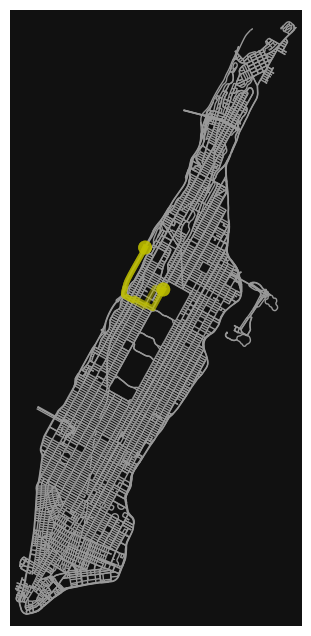

In [22]:
orig = list(G)[0]
dest = list(G)[120]
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

In [ ]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)